[Novo Coronavírus (2019-nCov) - Situação Epidemiológica no ESP](http://www.saude.sp.gov.br/cve-centro-de-vigilancia-epidemiologica-prof.-alexandre-vranjac/areas-de-vigilancia/doencas-de-transmissao-respiratoria/coronavirus-covid-19/situacao-epidemiologica)

In [219]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import folium
from folium import plugins
import tabula
import pandas as pd
import os

In [5]:
df = tabula.read_pdf("coronavirus100420_44situacao_epidemiologica.pdf", pages='all')

In [6]:
df

[  Unnamed: 0 Situação em números de COVID-19 (casos confirmados e óbitos)
 0    Mundial  Óbitos Mundo Estado de São Paulo Óbitos Estado...          ,
    Casos de COVID-19 por município de residência, São Paulo, 21 de janeiro a 10 de abril de 2020  \
 0   MUNICÍPIO CONFIRMADOS ÓBITOS MUNICÍPIO CONFIRM...                                              
 1        ÁGUAS DE LINDÓIA 1 1 ILHA COMPRIDA 9 - POÁ 9                                              
 2   ÁGUAS DE SÃO PEDRO 1 - ILHABELA 1 - PORTO FERR...                                              
 3           AGUDOS 1 1 INDAIATUBA 3 - PRAIA GRANDE 14                                              
 4   AMERICANA 3 2 IRACEMÁPOLIS 1 - PRESIDENTE PRUD...                                              
 5   ARAÇATUBA 15 - ITANHAÉM 2 - PRESIDENTE VENCESL...                                              
 6   ARAÇOIABA DA SERRA 1 - ITAPECERICA DA SERRA 26...                                              
 7   ARARAQUARA 7 1 ITAPETININGA 3 1 RIBE

In [15]:
len(df)

4

In [16]:
df_covid = df[1]

In [17]:
df_covid.head()

,"Casos de COVID-19 por município de residência, São Paulo, 21 de janeiro a 10 de abril de 2020",Unnamed: 0
0,MUNICÍPIO CONFIRMADOS ÓBITOS MUNICÍPIO CONFIRM...,ÓBITOS
1,ÁGUAS DE LINDÓIA 1 1 ILHA COMPRIDA 9 - POÁ 9,1
2,ÁGUAS DE SÃO PEDRO 1 - ILHABELA 1 - PORTO FERR...,1
3,AGUDOS 1 1 INDAIATUBA 3 - PRAIA GRANDE 14,1
4,AMERICANA 3 2 IRACEMÁPOLIS 1 - PRESIDENTE PRUD...,2


In [18]:
df_covid.columns

Index(['Casos de COVID-19 por município de residência, São Paulo, 21 de janeiro a 10 de abril de 2020', 'Unnamed: 0'], dtype='object')

In [19]:
data = df_covid['Casos de COVID-19 por município de residência, São Paulo, 21 de janeiro a 10 de abril de 2020'].tolist()

In [21]:
data[:5]

['MUNICÍPIO CONFIRMADOS ÓBITOS MUNICÍPIO CONFIRMADOS ÓBITOS MUNICÍPIO CONFIRMADOS',
 'ÁGUAS DE LINDÓIA 1 1 ILHA COMPRIDA 9 - POÁ 9',
 'ÁGUAS DE SÃO PEDRO 1 - ILHABELA 1 - PORTO FERREIRA 2',
 'AGUDOS 1 1 INDAIATUBA 3 - PRAIA GRANDE 14',
 'AMERICANA 3 2 IRACEMÁPOLIS 1 - PRESIDENTE PRUDENTE 3']

In [37]:
data2 = [str(item[0]) + " " + str(item[1]) for item in zip(data, df_covid['Unnamed: 0'].tolist())]

In [38]:
data2[:5]

['MUNICÍPIO CONFIRMADOS ÓBITOS MUNICÍPIO CONFIRMADOS ÓBITOS MUNICÍPIO CONFIRMADOS ÓBITOS',
 'ÁGUAS DE LINDÓIA 1 1 ILHA COMPRIDA 9 - POÁ 9 1',
 'ÁGUAS DE SÃO PEDRO 1 - ILHABELA 1 - PORTO FERREIRA 2 1',
 'AGUDOS 1 1 INDAIATUBA 3 - PRAIA GRANDE 14 1',
 'AMERICANA 3 2 IRACEMÁPOLIS 1 - PRESIDENTE PRUDENTE 3 2']

In [39]:
del data2[0]
data2[:5]

['ÁGUAS DE LINDÓIA 1 1 ILHA COMPRIDA 9 - POÁ 9 1',
 'ÁGUAS DE SÃO PEDRO 1 - ILHABELA 1 - PORTO FERREIRA 2 1',
 'AGUDOS 1 1 INDAIATUBA 3 - PRAIA GRANDE 14 1',
 'AMERICANA 3 2 IRACEMÁPOLIS 1 - PRESIDENTE PRUDENTE 3 2',
 'ARAÇATUBA 15 - ITANHAÉM 2 - PRESIDENTE VENCESLAU 4 2']

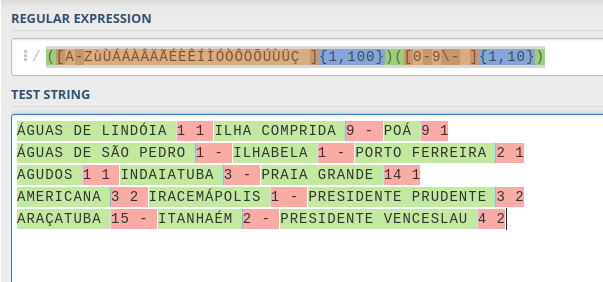

In [54]:
# ([A-ZùÙÁÁÀÂÄÉÈÊÍÌÓÒÔÖÚÙÜ ])|([0-9-])

import re

s = 'ÁGUAS DE LINDÓIA 1 1 ILHA COMPRIDA 9 - POÁ 9 1'

m = re.compile(r'([A-ZùÙÁÁÀÂÄÃÉÈÊÍÌÓÒÔÖÕÚÙÜÇ ]{1,100})([0-9- ]{1,10})')
g = m.findall(s)
g

[('ÁGUAS DE LINDÓIA ', '1 1 '), ('ILHA COMPRIDA ', '9 - '), ('POÁ ', '9 1')]

In [57]:
data3 = []
for string in data2:
    data3 += m.findall(string)
data3[:5]

[('ÁGUAS DE LINDÓIA ', '1 1 '),
 ('ILHA COMPRIDA ', '9 - '),
 ('POÁ ', '9 1'),
 ('ÁGUAS DE SÃO PEDRO ', '1 - '),
 ('ILHABELA ', '1 - ')]

In [60]:
cases  = '9 - '.split(" ")
cases = [int(s) if s != '-' else None for s in cases if s != '']
cases

[9, None]

In [69]:
data4 = []
for item in data3:
    cases = item[1]
    cases = cases.split(" ")
    cases = [int(s) if s != '-' else 0 for s in cases if s != '']
    data4.append([item[0][:-1]] + cases)
        
data4[:5]

[['ÁGUAS DE LINDÓIA', 1, 1],
 ['ILHA COMPRIDA', 9, 0],
 ['POÁ', 9, 1],
 ['ÁGUAS DE SÃO PEDRO', 1, 0],
 ['ILHABELA', 1, 0]]

In [70]:
df_covid_municipios = pd.DataFrame(data=data4, columns=["municipio", "confirmados", "obitos"])
df_covid_municipios.head()

,municipio,confirmados,obitos
0,ÁGUAS DE LINDÓIA,1.0,1.0
1,ILHA COMPRIDA,9.0,0.0
2,POÁ,9.0,1.0
3,ÁGUAS DE SÃO PEDRO,1.0,0.0
4,ILHABELA,1.0,0.0


In [140]:
df_covid_municipios

,municipio,confirmados,obitos
0,ÁGUAS DE LINDÓIA,1.0,1.0
1,ILHA COMPRIDA,9.0,0.0
2,POÁ,9.0,1.0
3,ÁGUAS DE SÃO PEDRO,1.0,0.0
4,ILHABELA,1.0,0.0
...,...,...,...
155,IGNORADO,5.0,0.0
156,HORTOLÂNDIA,2.0,0.0
157,PIRACICABA,12.0,0.0
158,IBIÚNA,1.0,0.0


In [146]:
for _, row in df_covid_municipios.iterrows():
    for col in row.index:
        print(col)
    break

municipio
confirmados
obitos


In [145]:
row.index

Index(['municipio', 'confirmados', 'obitos'], dtype='object')

# Organizando em Funções

In [180]:
def parse_ugly_df(ugly_df):
#     col_name = ugly_df.columns[0]
#     data = ugly_df[col_name].tolist()
#     try:
#         data2 = [str(item[0]) + " " + str(item[1]) for item in zip(data, ugly_df['Unnamed: 0'].tolist())]
#     except:
#         try:
#             data2 = [str(item[0]) + " " + str(item[1]) + " " + str(item[2]) for item in zip(ugly_df['Unnamed: 0'].tolist(), data, ugly_df['Unnamed: 1'].tolist())]
#         except:
#             data2 = data
    data = []
    for _, row in ugly_df.iterrows():
        string = ''
        for col in row.index:
            string  += " " + str(row[col])
        data.append(string)
    
    del data[0]
    data2 = []
    for string in data:
        data2 += m.findall(string)
    data3 = []
    for item in data2:
        cases = item[1]
        cases = cases.split(" ")
        cases = [int(s) if s != '-' else 0 for s in cases if s != '']
        data3.append([item[0][:-1]] + cases)
    #print(data4)
    petty_df = pd.DataFrame(data=data3, columns=["municipio", "confirmados", "obitos"])
    return petty_df

In [75]:
arr = os.listdir("./boletins")
arr

['boletim_36_02-04-20.pdf',
 'boletim_42_08-04-20.pdf',
 'boletim_40_06-04-20.pdf',
 'boletim_43_09-04-20.pdf',
 'boletim_37_03-04-20.pdf',
 'boletim_33_30-03-20.pdf',
 'boletim_34_31-03-20.pdf',
 'boletim_41_07-04-20.pdf',
 'boletim_45_11-04-20.pdf',
 'boletim_30_25-03-20.pdf',
 'boletim_35_01-04-20.pdf',
 'boletim_44_10-04-20.pdf',
 'boletim_38_04-04-20.pdf',
 'boletim_32_27-03-20.pdf',
 'boletim_31_26-03-20.pdf',
 'boletim_39_05-04-20.pdf']

In [102]:
'02-04-20.pdf'[:-4] + "20"

'02-04-2020'

In [155]:
df_list = []
for pdf in arr:
    boletim_and_date = pdf.split("_")
    boletim = boletim_and_date[1]
    date = boletim_and_date[2][:-4] + "20"
    file_path = "./boletins/" + pdf
    ugly_df_list = tabula.read_pdf(file_path, pages='all')
    for ugly_df in ugly_df_list:
        if ugly_df.shape[0] > 0 and ("Casos de COVID-19 por município de residência" in ugly_df.columns[0] or \
        "Casos de COVID-19 por município de residência" in ugly_df.columns[1]):
            break
    petty_df = parse_ugly_df(ugly_df)
    petty_df["data"] = date
    petty_df["boletim"] = boletim
    df_list.append(petty_df)
    
df_covid = pd.concat(df_list)

Got stderr: abr 12, 2020 1:30:34 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:34 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:34 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:35 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:35 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:36 PM org.apache.pdfbox.pdmodel.font

[(' ÁGUAS DE LINDÓIA ', '1 - '), ('ITAPEVI ', '6 - '), ('SALTO DE PIRAPORA ', '1 -'), (' AGUDOS ', '1 - '), ('ITAQUAQUECETUBA ', '5 - '), ('SANTA ISABEL ', '1 -'), (' AMERICANA ', '2 - '), ('ITARARÉ ', '1 - '), ('SANTANA DE PARNAÍBA ', '20 -'), (' ARAÇATUBA ', '2 - '), ('ITU ', '1 - '), ('SANTO ANDRÉ ', '59 2'), (' ARARAQUARA ', '1 - '), ('ITUPEVA ', '1 - '), ('SANTOS ', '37 -'), (' ARUJÁ ', '4 1 '), ('JAGUARIÚNA ', '1 - '), ('SÃO BERNARDO DO CAMPO ', '59 2'), (' ASSIS ', '1 - '), ('JANDIRA ', '2 - '), ('SÃO CAETANO DO SUL ', '33 1'), (' BARUERI ', '26 - '), ('JAÚ ', '1 - '), ('SÃO JOSÉ DO RIO PARDO ', '1 -'), (' BRODOWSKI ', '1 - '), ('JUNDIAÍ ', '5 - '), ('SÃO JOSÉ DO RIO PRETO ', '7 -'), (' CACHOEIRA PAULISTA ', '1 - '), ('LENÇÓIS PAULISTA ', '1 - '), ('SÃO JOSÉ DOS CAMPOS ', '14 -'), (' CAIEIRAS ', '15 1 '), ('LIMEIRA ', '2 - '), ('SÃO PAULO ', '2815 164'), (' CAJAMAR ', '1 - '), ('LOUVEIRA ', '1 - '), ('SÃO SEBASTIÃO ', '3 -'), (' CAMPINAS ', '23 1 '), ('MAIRIPORÃ ', '3 - '), ('SÃ

Got stderr: abr 12, 2020 1:30:37 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:37 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:37 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Bold are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:38 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:38 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:38 PM org.apache.pdfbox.pdmodel

[(' ÁGUAS DE LINDÓIA ', '1 1 '), ('INDAIATUBA ', '3 - '), ('PRAIA GRANDE ', '12 -'), (' AGUDOS ', '1 1 '), ('IRACEMÁPOLIS ', '1 - '), ('PRESIDENTE PRUDENTE ', '1 -'), (' AMERICANA ', '3 2 '), ('ITANHAÉM ', '2 - '), ('PRESIDENTE VENCESLAU ', '2 1'), (' ARAÇATUBA ', '12 - '), ('ITAPECERICA DA SERRA ', '20 1 '), ('PROMISSÃO ', '1 -'), (' ARARAQUARA ', '5 - '), ('ITAPETININGA ', '1 - '), ('RIBEIRÃO PIRES ', '12 -'), (' ARARAS ', '2 - '), ('ITAPEVI ', '13 2 '), ('RIBEIRÃO PRETO ', '36 3'), (' ARUJÁ ', '8 1 '), ('ITAPIRA ', '1 - '), ('RIO CLARO ', '3 -'), (' ASSIS ', '2 - '), ('ITAQUAQUECETUBA ', '20 - '), ('RIO GRANDE DA SERRA ', '4 -'), (' ATIBAIA ', '9 - '), ('ITARARÉ ', '1 - '), ('SALTO ', '2 -'), (' AVARÉ ', '1 - '), ('ITATIBA ', '1 1 '), ('SALTO DE PIRAPORA ', '2 -'), (' BADY BASSITT ', '1 - '), ('ITU ', '1 - '), ('SANTA BRANCA ', '2 1'), (' BARRETOS ', '4 - '), ('ITUPEVA ', '1 - '), ('SANTA CRUZ DO RIO PARDO ', '1 -'), (' BARUERI ', '41 2 '), ('JABOTICABAL ', '4 1 '), ('SANTA ISABEL '

Got stderr: abr 12, 2020 1:30:40 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:40 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:40 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Bold are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:41 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:41 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:41 PM org.apache.pdfbox.pdmodel

[(' ÁGUAS DE LINDÓIA ', '1 - '), ('IRACEMÁPOLIS ', '1 - '), ('PROMISSÃO ', '1 -'), (' AGUDOS ', '1 - '), ('ITANHAÉM ', '2 - '), ('RIBEIRÃO PIRES ', '4 -'), (' AMERICANA ', '3 2 '), ('ITAPECERICA DA SERRA ', '9 1 '), ('RIBEIRÃO PRETO ', '28 1'), (' ARAÇATUBA ', '8 - '), ('ITAPETININGA ', '1 - '), ('RIO CLARO ', '2 -'), (' ARARAQUARA ', '4 - '), ('ITAPEVI ', '11 1 '), ('SALTO DE PIRAPORA ', '1 -'), (' ARUJÁ ', '6 1 '), ('ITAPIRA ', '1 - '), ('SANTA BRANCA ', '2 -'), (' ASSIS ', '1 - '), ('ITAQUAQUECETUBA ', '12 - '), ('SANTA CRUZ DO RIO PARDO ', '2 -'), (' ATIBAIA ', '7 - '), ('ITARARÉ ', '1 - '), ('SANTA ISABEL ', '2 -'), (' BARUERI ', '31 1 '), ('ITU ', '1 - '), ('SANTANA DE PARNAÍBA ', '25 -'), (' BAURU ', '6 1 '), ('ITUPEVA ', '1 - '), ('SANTO ANDRÉ ', '74 3'), (' BIRIGUI ', '1 - '), ('JABOTICABAL ', '3 1 '), ('SANTOS ', '75 2'), (' BOITUVA ', '1 - '), ('JAGUARIUNA ', '1 - '), ('SÃO BERNARDO DO CAMPO ', '89 5'), (' BOTUCATU ', '7 - '), ('JANDIRA ', '2 - '), ('SÃO CAETANO DO SUL ', '3

Got stderr: abr 12, 2020 1:30:44 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:44 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:44 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Bold are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:45 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:45 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:45 PM org.apache.pdfbox.pdmodel

[(' ÁGUAS DE LINDÓIA ', '1 1 '), ('ILHA COMPRIDA ', '9 - '), ('PIRAJUÍ ', '1 -'), (' AGUDOS ', '1 1 '), ('ILHA BELA ', '1 - '), ('POÁ ', '7 1'), (' AMERICANA ', '3 2 '), ('INDAIATUBA ', '3 - '), ('PRAIA GRANDE ', '13 1'), (' ARAÇATUBA ', '13 - '), ('IRACEMÁPOLIS ', '1 - '), ('PRESIDENTE PRUDENTE ', '3 2'), (' ARARAQUARA ', '5 - '), ('ITANHAÉM ', '2 - '), ('PRESIDENTE VENCESLAU ', '3 2'), (' ARARAS ', '2 - '), ('ITAPECERICA DA SERRA ', '22 1 '), ('PROMISSÃO ', '1 -'), (' ARTUR NOGUEIRA ', '1 - '), ('ITAPETININGA ', '1 - '), ('RIBEIRÃO PIRES ', '15 -'), (' ARUJÁ ', '9 1 '), ('ITAPEVA ', '1 - '), ('RIBEIRÃO PRETO ', '36 4'), (' ASSIS ', '3 1 '), ('ITAPEVI ', '15 3 '), ('RIO CLARO ', '3 1'), (' ATIBAIA ', '11 - '), ('ITAPIRA ', '1 - '), ('RIO GRANDE DA SERRA ', '4 -'), (' AVARÉ ', '3 - '), ('ITAQUAQUECETUBA ', '24 - '), ('SÃO PAULO ', '6 -'), (' BADY BASSITT ', '1 - '), ('ITARARÉ ', '1 - '), ('SALTO ', '3 -'), (' BARRA DO TURVO ', '1 - '), ('ITATIBA ', '1 1 '), ('SALTO DE PIRAPORA ', '2 -'

Got stderr: abr 12, 2020 1:30:48 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:48 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:48 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:48 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:50 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:50 PM org.apache.pdfbox.pdmodel.font

[(' ADAMANTINA ', '1 - '), ('IRACEMÁPOLIS ', '1 - '), ('PROMISSÃO ', '1 -'), (' ÁGUAS DE LINDÓIA ', '1 - '), ('ITANHAÉM ', '2 - '), ('RIBEIRÃO PIRES ', '4 -'), (' AGUDOS ', '1 - '), ('ITAPECERICA DA SERRA ', '6 1 '), ('RIBEIRÃO PRETO ', '15 1'), (' AMERICANA ', '2 - '), ('ITAPEVI ', '6 - '), ('RIO CLARO ', '1 -'), (' ARAÇATUBA ', '2 - '), ('ITAQUAQUECETUBA ', '9 - '), ('SALTO DE PIRAPORA ', '1 -'), (' ARARAQUARA ', '2 - '), ('ITARARÉ ', '1 - '), ('SANTA ISABEL ', '1 -'), (' ARUJÁ ', '4 1 '), ('ITU ', '1 - '), ('SANTANA DE PARNAÍBA ', '22 -'), (' ASSIS ', '1 - '), ('ITUPEVA ', '1 - '), ('SANTO ANDRÉ ', '70 2'), (' ATIBAIA ', '2 - '), ('JABOTICABAL ', '3 1 '), ('SANTOS ', '55 -'), (' BARUERI ', '28 1 '), ('JAGUARIUNA ', '1 - '), ('SÃO BERNARDO DO CAMPO ', '70 4'), (' BAURU ', '2 - '), ('JANDIRA ', '2 - '), ('SÃO CAETANO DO SUL ', '36 1'), (' BRODOWSKI ', '1 - '), ('JAÚ ', '1 - '), ('SÃO JOSÉ DO RIO PARDO ', '1 -'), (' CACHOEIRA PAULISTA ', '1 - '), ('JUNDIAÍ ', '6 - '), ('SÃO JOSÉ DO RIO

Got stderr: abr 12, 2020 1:30:51 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:51 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:52 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:52 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:53 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:53 PM org.apache.pdfbox.pdmod

[(' ARUJÁ ', '1 - '), ('JUNDIAÍ ', '3 - '), ('SÃO CAETANO DO SUL ', '27 -'), (' BARUERI ', '6 - '), ('LOUVEIRA ', '1 - '), ('SÃO JOSE DO RIO PRETO ', '3 -'), (' BRODOWSKI ', '1 - '), ('MAIRIPORÃ ', '2 - '), ('SÃO JOSE DOS CAMPOS ', '5 -'), (' CAIEIRAS ', '3 - '), ('MAUÁ ', '2 - '), ('SÃO PAULO ', '1233 103'), (' CAJAMAR ', '1 - '), ('MOGI DAS CRUZES ', '9 - '), ('SÃO PEDRO ', '1 -'), (' CAMPINAS ', '11 - '), ('OSASCO ', '14 1 '), ('SÃO SEBASTIAO ', '2 -'), (' CARAPICUÍBA ', '3 - '), ('PAULÍNIA ', '1 - '), ('SOROCABA ', '3 1'), (' COTIA ', '6 - '), ('PENÁPOLIS ', '1 - '), ('SUZANO ', '1 -'), (' DIADEMA ', '2 - '), ('PIRACICABA ', '3 - '), ('TABOÃO DA SERRA ', '3 1'), (' EMBU DAS ARTES ', '3 1 '), ('POÁ ', '1 - '), ('TATUÍ ', '1 -'), (' FERRAZ DE VASCONCELOS ', '3 - '), ('PORTO FELIZ ', '1 - '), ('TAUBATÉ ', '1 -'), (' GUARULHOS ', '14 2 '), ('RIBEIRÃO PIRES ', '1 - '), ('UMUARAMA ', '1 -'), (' HORTOLÂNDIA ', '1 - '), ('RIBEIRÃO PRETO ', '5 1 '), ('VALINHOS ', '1 -'), (' IRACEMÁPOLIS ', 

Got stderr: abr 12, 2020 1:30:54 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:54 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:55 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:55 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:56 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:56 PM org.apache.pdfbox.pdmodel.font

[(' AMERICANA ', '2 - '), ('JAGUARIÚNA ', '1 - '), ('SANTOS ', '14 -'), (' ARACATUBA ', '1 - '), ('JANDIRA ', '2 - '), ('SÃO BERNARDO DO CAMPO ', '44 1'), (' ARUJÁ ', '2 - '), ('JUNDIAÍ ', '3 - '), ('SÃO CAETANO DO SUL ', '30 1'), (' BARUERI ', '20 - '), ('LENÇÓIS PAULISTA ', '1 - '), ('SÃO JOSÉ DO RIO PARDO ', '1 -'), (' BAURU ', '1 - '), ('LOUVEIRA ', '1 - '), ('SÃO JOSÉ DO RIO PRETO ', '6 -'), (' BRODOWSKI ', '1 - '), ('MAIRIPORÃ ', '2 - '), ('SÃO JOSÉ DOS CAMPOS ', '9 -'), (' CACHOEIRA PAULISTA ', '1 - '), ('MATÃO ', '1 - '), ('SÃO PAULO ', '1885 121'), (' CAIEIRAS ', '9 1 '), ('MAUÁ ', '3 - '), ('SÃO PEDRO ', '1 -'), (' CAJAMAR ', '1 - '), ('MOGI DAS CRUZES ', '10 - '), ('SÃO SEBASTIÃO ', '2 -'), (' CAMPINAS ', '15 1 '), ('MOGI GUAÇU ', '1 - '), ('SÃO VICENTE ', '1 -'), (' CARAPICUÍBA ', '6 - '), ('NOVA ODESSA ', '1 - '), ('SOROCABA ', '3 1'), (' COTIA ', '12 - '), ('OSASCO ', '33 2 '), ('SUZANO ', '1 -'), (' DIADEMA ', '5 - '), ('PAULINIA ', '1 - '), ('TABOÃO DA SERRA ', '12 1'),

Got stderr: abr 12, 2020 1:30:57 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:57 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:57 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Bold are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:58 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:58 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:30:59 PM org.apache.pdfbox.pdmodel

[(' ÁGUAS DE LINDÓIA ', '1 - '), ('INDAIATUBA ', '3 - '), ('PROMISSÃO ', '1 -'), (' AGUDOS ', '1 - '), ('IRACEMÁPOLIS ', '1 - '), ('RIBEIRÃO PIRES ', '9 -'), (' AMERICANA ', '3 2 '), ('ITANHAÉM ', '2 - '), ('RIBEIRÃO PRETO ', '29 2'), (' ARAÇATUBA ', '8 - '), ('ITAPECERICA DA SERRA ', '12 1 '), ('RIO CLARO ', '3 -'), (' ARARAQUARA ', '5 - '), ('ITAPETININGA ', '1 - '), ('RIO GRANDE DA SERRA ', '1 -'), (' ARARAS ', '2 - '), ('ITAPEVI ', '12 1 '), ('SALTO ', '1 -'), (' ARUJÁ ', '6 1 '), ('ITAPIRA ', '1 - '), ('SALTO DE PIRAPORA ', '2 -'), (' ASSIS ', '2 - '), ('ITAQUAQUECETUBA ', '15 - '), ('SANTA BRANCA ', '2 1'), (' ATIBAIA ', '9 - '), ('ITARARÉ ', '1 - '), ('SANTA CRUZ DO RIO PARDO ', '2 -'), (' BARRETOS ', '1 - '), ('ITATIBA ', '1 1 '), ('SANTA ISABEL ', '2 -'), (' BARUERI ', '34 2 '), ('ITU ', '1 - '), ('SANTANA DE PARNAÍBA ', '27 -'), (' BAURU ', '7 2 '), ('ITUPEVA ', '1 - '), ('SANTO ANDRÉ ', '98 3'), (' BEBEDOURO ', '1 - '), ('JABOTICABAL ', '4 1 '), ('SANTOS ', '87 2'), (' BIRIG

Got stderr: abr 12, 2020 1:31:04 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:04 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:04 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:05 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:05 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:05 PM org.apache.pdfbox.pdmod

[(' BARUERI ', '1'), (' ', '- '), ('JUNDIAI ', '1 - '), ('SAO JOSE DO RIO PRETO ', '1 -'), (' CAIEIRAS ', '1'), (' ', '- '), ('MAUA ', '2 - '), ('SAO JOSE DOS CAMPOS ', '2 -'), (' CAMPINAS ', '4'), (' ', '- '), ('MOGI DAS CRUZES ', '4 - '), ('SAO PAULO ', '722 44'), (' CARAPICUIBA ', '2'), (' ', '- '), ('OSASCO ', '3 - '), ('SAO SEBASTIAO ', '2 -'), (' COTIA ', '6'), (' ', '- '), ('POA ', '1 - '), ('SUZANO ', '1 -'), (' EMBU DAS ARTES ', '1'), (' ', '- '), ('RIBEIRAO PIRES ', '1 - '), ('TABOAO DA SERRA ', '1 1'), (' FERRAZ DE VASCONCELOS ', '1'), (' ', '- '), ('RIO CLARO ', '1 - '), ('TAUBATE ', '1 -'), (' GUARULHOS ', '5'), (' ', '1 '), ('SANTANA DE PARNAIBA ', '4 - '), ('VALINHOS ', '1 -'), (' HORTOLANDIA ', '2'), (' ', '- '), ('SANTO ANDRE ', '17 - '), ('VARGEM GRANDE ', '0 1'), (' IRACEMAPOLIS ', '1'), (' ', '- '), ('SAO BERNARDO DO CAMPO ', '13 - '), (' ', '10 -'), (' JAGUARIUNA ', '1'), (' ', '- '), ('SAO CAETANO DO SUL ', '16 - '), ('IGNORADO OU EXTERIOR ', '33 1')]


Got stderr: abr 12, 2020 1:31:07 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:07 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:07 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:07 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:08 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:08 PM org.apache.pdfbox.pdmodel.font

[(' AMERICANA ', '2 - '), ('JAGUARIÚNA ', '1 - '), ('SANTO ANDRÉ ', '51 2'), (' ARACATUBA ', '2 - '), ('JANDIRA ', '2 - '), ('SANTOS ', '23 -'), (' ARUJÁ ', '2 - '), ('JUNDIAÍ ', '5 - '), ('SÃO BERNARDO DO CAMPO ', '52 2'), (' BARUERI ', '21 - '), ('LENÇÓIS PAULISTA ', '1 - '), ('SÃO CAETANO DO SUL ', '32 1'), (' BAURU ', '2 - '), ('LIMEIRA ', '2 - '), ('SÃO JOSÉ DO RIO PARDO ', '1 -'), (' BRODOWSKI ', '1 - '), ('LOUVEIRA ', '1 - '), ('SÃO JOSÉ DO RIO PRETO ', '7 -'), (' CACHOEIRA PAULISTA ', '1 - '), ('MAIRIPORÃ ', '2 - '), ('SÃO JOSÉ DOS CAMPOS ', '12 -'), (' CAIEIRAS ', '11 1 '), ('MATÃO ', '1 - '), ('SÃO PAULO ', '2418 144'), (' CAJAMAR ', '1 - '), ('MAUÁ ', '3 - '), ('SÃO PEDRO ', '1 -'), (' CAMPINAS ', '22 1 '), ('MOGI DAS CRUZES ', '11 - '), ('SÃO SEBASTIAO ', '3 1'), (' CARAPICUÍBA ', '7 - '), ('MOGI GUAÇU ', '1 - '), ('SÃO VICENTE ', '2 -'), (' COTIA ', '21 2 '), ('NOVA ODESSA ', '1 - '), ('SOROCABA ', '3 1'), (' DIADEMA ', '8 - '), ('OSASCO ', '43 2 '), ('SUZANO ', '4 1'), ('

Got stderr: abr 12, 2020 1:31:16 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:16 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:16 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:17 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:18 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:18 PM org.apache.pdfbox.pdmod

[(' ARUJÁ ', '1 - '), ('LOUVEIRA ', '1 - '), ('SÃO JOSÉ DOS CAMPOS ', '4 -'), (' BARUERI ', '3 - '), ('MAIRIPORÃ ', '2 - '), ('SÃO PAULO ', '1044 62'), (' CAIEIRAS ', '2 - '), ('MAUÁ ', '2 - '), ('SÃO SEBASTIÃO ', '2 -'), (' CAMPINAS ', '5 - '), ('MOGI DAS CRUZES ', '8 - '), ('SOROCABA ', '1 -'), (' CARAPICUÍBA ', '2 - '), ('OSASCO ', '4 - '), ('SUZANO ', '1 -'), (' COTIA ', '6 - '), ('POÁ ', '1 - '), ('TABOÃO DA SERRA ', '2 1'), (' EMBU DAS ARTES ', '1 - '), ('RIBEIRÃO PIRES ', '1 - '), ('TATUÍ ', '1 -'), (' DIADEMA ', '1 - '), ('RIBEIRÃO PRETO ', '3 1 '), ('TAUBATÉ ', '1 -'), (' FERRAZ DE VASCONCELOS ', '2 - '), ('RIO CLARO ', '1 - '), ('VALINHOS ', '1 -'), (' GUARULHOS ', '13 2 '), ('SANTANA DE PARNAÍBA ', '6 - '), ('VARGEM GRANDE PAULISTA ', '2 1'), (' HORTOLÂNDIA ', '1 - '), ('SANTO ANDRÉ ', '17 - '), ('OUTRO PAÍS ', '27 -'), (' IRACEMÁPOLIS ', '1 - '), ('SÃO BERNARDO DO CAMPO ', '15 - '), ('OUTRO ESTADO ', '14 -'), (' JAGUARIÚNA ', '1 - '), ('SÃO CAETANO DO SUL ', '16 - '), ('IGN

Got stderr: abr 12, 2020 1:31:19 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:19 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:19 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:20 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:20 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:21 PM org.apache.pdfbox.pdmod

[(' ARUJÁ ', '1 - '), ('MAIRIPORÃ ', '1 - '), ('SÃO JOSE DOS CAMPOS ', '2 -'), (' BARUERI ', '3 - '), ('MAUÁ ', '2 - '), ('SÃO PAULO ', '899 53'), (' CAIEIRAS ', '2 - '), ('MOGI DAS CRUZES ', '7 - '), ('SÃO SEBASTIAO ', '2 -'), (' CAMPINAS ', '4 - '), ('OSASCO ', '3 - '), ('SUZANO ', '2 -'), (' CARAPICUÍBA ', '2 - '), ('POÁ ', '1 - '), ('TABOÃO DA SERRA ', '2 1'), (' COTIA ', '5 - '), ('RIBEIRÃO PRETO ', '1 1 '), ('TAUBATÉ ', '1 -'), (' EMBU DAS ARTES ', '1 - '), ('RIBEIRÃO PIRES ', '1 - '), ('TATUÍ ', '1 -'), (' GUARULHOS ', '9 1 '), ('RIO CLARO ', '1 - '), ('VALINHOS ', '1 -'), (' HORTOLÂNDIA ', '1 - '), ('SANTANA DE PARNAÍBA ', '6 - '), ('VARGEM GRANDE PAULISTA ', '1 1'), (' IRACEMÁPOLIS ', '1 - '), ('SANTO ANDRÉ ', '16 - '), ('OUTRO ESTADO ', '8 -'), (' JAGUARIÚNA ', '1 - '), ('SÃO BERNARDO DO CAMPO ', '13 - '), ('OUTRO PAÍS ', '28 -'), (' JUNDIAÍ ', '2 - '), ('SÃO CAETANO DO SUL ', '17 - '), ('IGNORADO ', '1 1'), (' LOUVEIRA ', '2 - '), ('SÃO JOSE DO RIO PRETO ', '1 - ')]


Got stderr: abr 12, 2020 1:31:22 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:22 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:22 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:23 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri,Italic are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:23 PM org.apache.pdfbox.pdmodel.font.PDCIDFontType2 <init>
INFO: OpenType Layout tables used in font ABCDEE+Calibri are not implemented in PDFBox and will be ignored
abr 12, 2020 1:31:23 PM org.apache.pdfbox.pdmodel.font

[(' AGUAS DE LINDOIA ', '1 '), ('ITANHAEM ', '2 '), ('PRAIA GRANDE ', '4'), (' AGUDOS ', '1 '), ('ITAPECERICA DA SERRA ', '9 1 '), ('PROMISSAO ', '1'), (' AMERICANA ', '3 2 '), ('ITAPETININGA ', '1 '), ('RIBEIRAO PIRES ', '4'), (' ARARAQUARA ', '2 '), ('ITAPEVI ', '8 1 '), ('RIBEIRAO PRETO ', '25 1'), (' ARCATUBA ', '4 '), ('ITAPIRA ', '1 '), ('RIO CLARO ', '2'), (' ARUJA ', '6 1 '), ('ITAQUAQUECETUBA ', '10 '), ('SALTO DE PIRAPORA ', '1'), (' ASSIS ', '1 '), ('ITARARE ', '1 '), ('SANTA BRANCA ', '2'), (' ATIBAIA ', '4 '), ('ITU ', '1 '), ('SANTA ISABEL ', '1'), (' BARUERI ', '30 1 '), ('ITUPEVA ', '1 '), ('SANTANA DE PARNAIBA ', '24'), (' BAURU ', '3 1 '), ('JABOTICABAL ', '3 1 '), ('SANTO ANDRE ', '72 3'), (' BOTUCATU ', '7 '), ('JAGUARIUNA ', '1 '), ('SANTOS ', '72 2'), (' BRODOWSKI ', '1 '), ('JANDIRA ', '2 '), ('SAO BERNARDO DO CAMPO ', '81 5'), (' CACHOEIRA PAULISTA ', '1 '), ('JAU ', '1 '), ('SAO CAETANO DO SUL ', '38 1'), (' CAIEIRAS ', '20 1 '), ('JOSE BONIFACIO ', '1 '), ('SÃ

In [168]:
df_covid

,municipio,confirmados,obitos,date,boletim
0,ÁGUAS DE LINDÓIA,1.0,0.0,02-04-2020,36
1,ITAPEVI,6.0,0.0,02-04-2020,36
2,SALTO DE PIRAPORA,1.0,0.0,02-04-2020,36
3,AGUDOS,1.0,0.0,02-04-2020,36
4,ITAQUAQUECETUBA,5.0,0.0,02-04-2020,36
...,...,...,...,...,...
96,IRACEMAPOLIS,1.0,NaN,05-04-2020,39
97,POA,3.0,NaN,05-04-2020,39
98,OUTRO PAIS,34.0,NaN,05-04-2020,39
99,ITANHAEM,2.0,NaN,05-04-2020,39


In [169]:
df_covid = df_covid.fillna(0)

In [176]:
df_covid = df_covid.sort_values(by=['boletim'])

In [181]:
df_covid = df_covid[["date", "boletim", "municipio", "confirmados", "obitos"]]

In [184]:
df_covid.columns = ["Dia", "Boletim", "Municipio", "Confirmados", "Obitos"]

In [185]:
df_covid

,Dia,Boletim,Municipio,Confirmados,Obitos
38,25-03-2020,30,SAO BERNARDO DO CAMPO,13.0,0.0
23,25-03-2020,30,TABOAO DA SERRA,1.0,1.0
22,25-03-2020,30,RIBEIRAO PIRES,1.0,0.0
20,25-03-2020,30,EMBU DAS ARTES,1.0,0.0
19,25-03-2020,30,SUZANO,1.0,0.0
...,...,...,...,...,...
105,11-04-2020,45,SÃO SEBASTIÃO,4.0,1.0
104,11-04-2020,45,MAIRIPORÃ,7.0,2.0
103,11-04-2020,45,CARAGUATATUBA,2.0,1.0
111,11-04-2020,45,SERTÃOZINHO,2.0,0.0


In [186]:
df_covid.to_csv("data/covid-19-municipios-sp.csv", index=False)

In [209]:
df_covid2 = pd.read_csv("data/covid-19-municipios-sp.csv")

In [210]:
sao_paulo = df_covid2[df_covid2["Municipio"] == "SÃO PAULO"]
sao_paulo

,Dia,Boletim,Municipio,Confirmados,Obitos
58,26-03-2020,31,SÃO PAULO,899.0,53.0
80,27-03-2020,32,SÃO PAULO,1044.0,62.0
147,30-03-2020,33,SÃO PAULO,1233.0,103.0
225,31-03-2020,34,SÃO PAULO,1885.0,121.0
304,01-04-2020,35,SÃO PAULO,2418.0,144.0
383,02-04-2020,36,SÃO PAULO,2815.0,164.0
416,03-04-2020,37,SÃO PAULO,3202.0,186.0
505,04-04-2020,38,SÃO PAULO,3496.0,212.0
707,06-04-2020,40,SÃO PAULO,3754.0,244.0
894,07-04-2020,41,SÃO PAULO,4258.0,296.0


In [211]:
sao_paulo.Obitos.diff()

58       NaN
80       9.0
147     41.0
225     18.0
304     23.0
383     20.0
416     22.0
505     26.0
707     32.0
894     52.0
1044    43.0
1106    45.0
1336    25.0
1495    13.0
Name: Obitos, dtype: float64

In [201]:
1044 - 899

145

# Obtendo qt casos

In [215]:
df_list = []
for municipio in df_covid2.Municipio.unique():
    d = df_covid2[df_covid2["Municipio"] == municipio]
    d["Qt_Novos_Casos"] = d.Confirmados.diff()
    d["Qt_Novas_Mortes"] = d.Obitos.diff()
    df_list.append(d)
    
df_covid3 = pd.concat(df_list)

/home/cloves/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/cloves/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [216]:
df_covid3 = df_covid3.sort_values(by=['Boletim', "Municipio"])

# Obtendo latitude e longitude

In [220]:
def do_geocode(address):
    geolocator = Nominatim(user_agent="clovesgtx@hotmail.com")
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [223]:
municipios = [municipio + " - SP" for municipio in df_covid2.Municipio.unique()]
municipios[:5]

['SAO BERNARDO DO CAMPO - SP',
 'TABOAO DA SERRA - SP',
 'RIBEIRAO PIRES - SP',
 ' EMBU DAS ARTES - SP',
 'SUZANO - SP']

In [ ]:
latitude = []
longitude = []
for m in municipios:
    location = do_geocode(endereco)
    latitude = location.latitude
#                 longitude = location.longitude